# GENERACIÓN DE DATOS SINTÉTICOS PARA EL MODELO DE NEOSPORA HACIENDO USO DEL MODELO DE REDES GENERATIVAS ADVERSAS

ft.Jhon Edison Rodriguez Maldonado, Julian felipe castellanos villate

en este ejersicio haremos la implementacion de un modelo de clasificacion random forest entrenado con el dataset NEOSPORA y exploraremos el analisis deeste datset y la implementacion de un feature selection

    implementacion de sklearn randomforest
    generacion de datos sinteticos en base a el modelo table GAN (CTGA) (ver archivo generacion datos cinteticos CTGAN)
    ananlisis de datos mediante feature selection (PCA)
    PCA en el dataset original
    PCA en el dataset sintetico

In [1]:
# importamos la libreria numpy de python
import numpy as np
#importamos la libreria pandas que nos permite crear modelos de datos
import pandas as pd
#importamos el clasificador rde random forest de la libreria sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


source_df  = pd.read_excel("Neospora.xls");

source_df["EDAD"]  = pd.factorize(source_df['EDAD'])[0]
source_df["RAZA"]  = pd.factorize(source_df['RAZA'])[0]
source_df["NEOSPORA"]  = pd.factorize(source_df['NEOSPORA'])[0]
source_df["TORO"]  = pd.factorize(source_df['TORO'])[0]
source_df["INSEMINACION"]  = pd.factorize(source_df['INSEMINACION'])[0]
source_df["ABORTO"]  = pd.factorize(source_df['ABORTO'])[0]
source_df["REPETICION"]  = pd.factorize(source_df['REPETICION'])[0]
source_df["NO_CARGA"]  = pd.factorize(source_df['NO_CARGA'])[0]
source_df["DISTOCIAS"]  = pd.factorize(source_df['DISTOCIAS'])[0]
source_df["TERNEROS_DEBILES"]  = pd.factorize(source_df['TERNEROS_DEBILES'])[0]
source_df["MUERTE_EMBRIONARIA"]  = pd.factorize(source_df['MUERTE_EMBRIONARIA'])[0]

source_df
 

,EDAD,RAZA,NEOSPORA,TORO,INSEMINACION,ABORTO,REPETICION,NO_CARGA,DISTOCIAS,TERNEROS_DEBILES,MUERTE_EMBRIONARIA
0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,1,1,1,0,0
2,0,2,1,0,0,0,1,1,1,0,0
3,0,2,1,0,1,1,0,1,0,1,0
4,0,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,1,0,1,1,0,1,0,1,0
996,2,2,0,0,0,0,1,0,1,0,0
997,1,2,0,0,0,0,1,0,1,0,0
998,1,2,1,0,1,0,0,1,0,0,0


## Creamos un set de datos que incluye todo el set e datos generado en el archivo "generacion de dtos sinteticos CTGAN" + el 80 % de el dataset original

In [2]:
df = pd.read_excel("Neospora_extended.xls");

df = df.append(source_df[0:800]);

df

,EDAD,RAZA,NEOSPORA,TORO,INSEMINACION,ABORTO,REPETICION,NO_CARGA,DISTOCIAS,TERNEROS_DEBILES,MUERTE_EMBRIONARIA
0,0,2,0,0,0,0,0,0,0,0,0
1,0,2,0,0,1,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,0,0
3,0,3,1,1,1,0,0,0,0,0,0
4,1,2,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,1,1,1,0,1,1,0,0
796,0,0,1,0,1,1,0,1,1,0,1
797,2,0,1,0,1,1,0,0,1,0,0
798,2,0,0,0,0,0,1,0,1,0,0


In [3]:
# Escojemos las features que el modelo debe de ultilizar (no de debe incluir el target NEOSPORA)

features = df.columns[0:11]
features = np.delete(features,[2])
print(features)


Index(['EDAD', 'RAZA', 'TORO', 'INSEMINACION', 'ABORTO', 'REPETICION',
       'NO_CARGA', 'DISTOCIAS', 'TERNEROS_DEBILES', 'MUERTE_EMBRIONARIA'],
      dtype='object')


## entrenamos un modelo random forest con el dataset general que incluye 10800 datos

In [4]:
clasifier = RandomForestClassifier(n_estimators=700)
clasifier.fit(df[features],df['NEOSPORA'])

RandomForestClassifier(n_estimators=700)

### hacemos pruebas  de predicion con el 20 % restante de datos del dataset original

In [5]:
source_df = source_df[800:1000]

preds = clasifier.predict(source_df[features])
print(preds)

[0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [6]:
test_factorised = pd.factorize(source_df['NEOSPORA'])[0]
print(test_factorised)

[0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0
 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1
 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0]


In [7]:
print(confusion_matrix(test_factorised,preds))
print(classification_report(test_factorised,preds))

[[ 55  11]
 [104  30]]
              precision    recall  f1-score   support

           0       0.35      0.83      0.49        66
           1       0.73      0.22      0.34       134

    accuracy                           0.42       200
   macro avg       0.54      0.53      0.42       200
weighted avg       0.60      0.42      0.39       200



### Creamos una funcion que nos permita entrenar un clasificador randomforest con un set e datos X= data Y = targets

### Aplicamos la reducion a 2 dimenciones del dataset original con PCA

In [8]:
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

X = source_df.drop(['NEOSPORA'], axis = 1)
Y = source_df['NEOSPORA']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, pd.Series(data=Y,name = 'NEOSPORA')], axis = 1)
PCA_df['NEOSPORA'] = LabelEncoder().fit_transform(PCA_df['NEOSPORA'])
PCA_df.head()


,PC1,PC2,NEOSPORA
0,2.837158,1.420405,1
1,-2.473607,0.731112,1
2,-2.473607,0.731112,1
3,0.539510,0.274609,1
4,-2.473607,0.731112,0


### Visualizamos la reducion a dos dimenciones del dataset otiginal

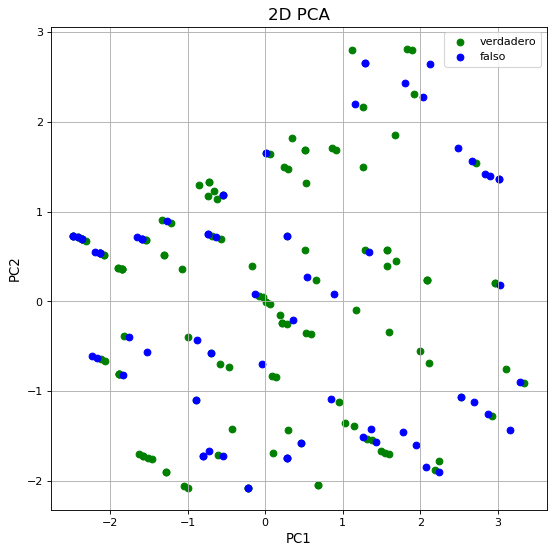

In [9]:
figure(num=None, figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')

classes = [0,1]
colors = ['g', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['NEOSPORA'] == clas, 'PC1'], 
                PCA_df.loc[PCA_df['NEOSPORA'] == clas, 'PC2'], 
                c = color)
    
plt.xlabel('PC1', fontsize = 12)
plt.ylabel('PC2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['verdadero', 'falso'])
plt.grid()

### entrenamos un modelo random forest con los datos reducidos a 2 dimenciones

In [10]:
print(pca.explained_variance_)

forest_test(X_pca, Y)

[2.6900562 1.5982359]
1.46875
[[29 10]
 [16  5]]
              precision    recall  f1-score   support

           0       0.64      0.74      0.69        39
           1       0.33      0.24      0.28        21

    accuracy                           0.57        60
   macro avg       0.49      0.49      0.48        60
weighted avg       0.54      0.57      0.55        60



### Aplicamos PCA para reducir a 3 dimenciones

In [13]:
X = source_df.drop(['NEOSPORA'], axis = 1)
Y = source_df['NEOSPORA']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2','PC3'])
PCA_df = pd.concat([PCA_df, pd.Series(data=Y,name = 'NEOSPORA')], axis = 1)
PCA_df['NEOSPORA'] = LabelEncoder().fit_transform(PCA_df['NEOSPORA'])
PCA_df['NEOSPORA']= PCA_df['NEOSPORA'].map({0:'b',1:'g'})
PCA_df.head()

,PC1,PC2,PC3,NEOSPORA
0,2.837158,1.420405,0.217921,g
1,-2.473607,0.731112,1.555527,g
2,-2.473607,0.731112,1.555527,g
3,0.539510,0.274609,2.070957,g
4,-2.473607,0.731112,1.555527,b


### Visualizamos PCA para el dataset original en 3 dimenciones

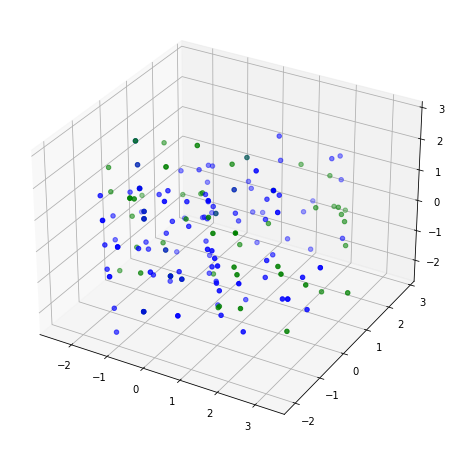

In [14]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(PCA_df.PC1,PCA_df.PC2,PCA_df.PC3,c=PCA_df['NEOSPORA'])

### Entrenamos un modelo random forest para los datso reducidos a 3 dimensiones

In [15]:
print(pca.explained_variance_)

forest_test(X_pca, Y)

[2.6900562  1.5982359  1.19523831]
1.34375
[[31  8]
 [15  6]]
              precision    recall  f1-score   support

           0       0.67      0.79      0.73        39
           1       0.43      0.29      0.34        21

    accuracy                           0.62        60
   macro avg       0.55      0.54      0.54        60
weighted avg       0.59      0.62      0.59        60



### Reducimos el dataset general de 10800 datos (10.000 sinteticos + 800 originales) a 2 dimenciones con PCA

In [16]:
X = df.drop(['NEOSPORA'], axis = 1)
Y = df['NEOSPORA']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, pd.Series(data=Y,name = 'NEOSPORA')], axis = 1)
PCA_df['NEOSPORA'] = LabelEncoder().fit_transform(PCA_df['NEOSPORA'])
PCA_df.head()

,PC1,PC2,NEOSPORA
0,-0.604169,-0.431188,0
1,-0.458904,0.257633,0
2,-0.997486,-0.400839,0
3,-0.856637,-0.808251,1
4,-0.639504,0.504008,0


### visualizamos PCA en 2 dimenciones para el dataset general

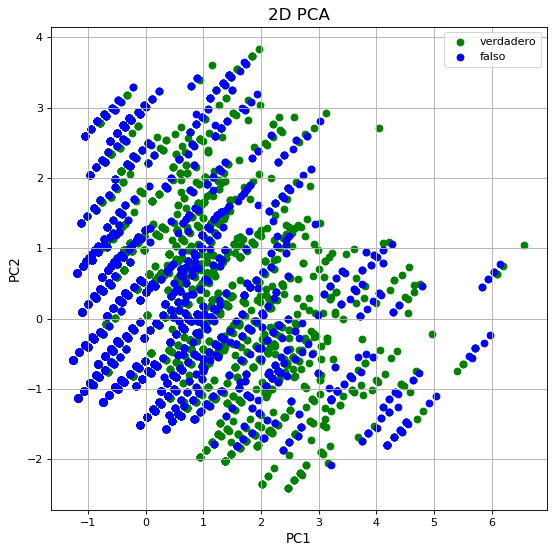

In [17]:
figure(num=None, figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')

classes = [0,1]
colors = ['g', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['NEOSPORA'] == clas, 'PC1'], 
                PCA_df.loc[PCA_df['NEOSPORA'] == clas, 'PC2'], 
                c = color)
    
plt.xlabel('PC1', fontsize = 12)
plt.ylabel('PC2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['verdadero', 'falso'])
plt.grid()

### Entrenamos un modelo random forest con el PCA de dos dimensiones para el dataset general

In [20]:
print(pca.explained_variance_)

forest_test(X_pca, Y)

[1.24850835 1.13442879]
6.546875
[[2713   47]
 [ 448   32]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2760
           1       0.41      0.07      0.11       480

    accuracy                           0.85      3240
   macro avg       0.63      0.52      0.52      3240
weighted avg       0.79      0.85      0.80      3240



### Reducimos el dataset general de 10800 datos a 3 dimensiones

In [22]:
X = df.drop(['NEOSPORA'], axis = 1)
Y = df['NEOSPORA']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2','PC3'])
PCA_df = pd.concat([PCA_df, pd.Series(data=Y,name = 'NEOSPORA')], axis = 1)
PCA_df['NEOSPORA'] = LabelEncoder().fit_transform(PCA_df['NEOSPORA'])
PCA_df['NEOSPORA']= PCA_df['NEOSPORA'].map({0:'b',1:'g'})
PCA_df.head()

,PC1,PC2,PC3,NEOSPORA
0,-0.604169,-0.431188,-1.282531,b
1,-0.458904,0.257633,0.280158,b
2,-0.997486,-0.400839,-0.097791,b
3,-0.856637,-0.808251,1.156816,g
4,-0.639504,0.504008,1.979824,b


### visualizamos en 3 dimensiones el PCA de 3 dimenciones del dataset general

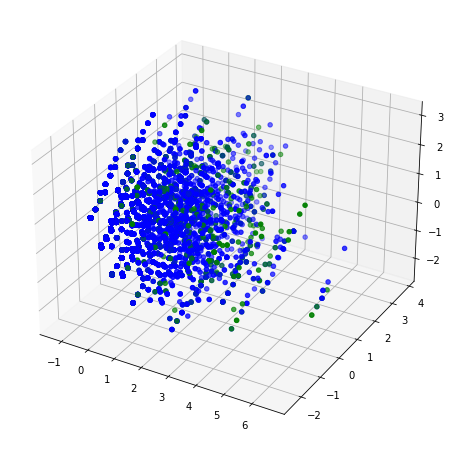

In [23]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(PCA_df.PC1,PCA_df.PC2,PCA_df.PC3,c=PCA_df['NEOSPORA'])

### Entrenamos un modelo random forest con el PCA de 3 dimensiones para el dataset general

In [24]:
print(pca.explained_variance_)

forest_test(X_pca, Y)

[1.24850835 1.13442879 1.03649903]
4.84375
[[2721   39]
 [ 449   31]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2760
           1       0.44      0.06      0.11       480

    accuracy                           0.85      3240
   macro avg       0.65      0.53      0.52      3240
weighted avg       0.80      0.85      0.80      3240

